# Plotting and SunPy

## Useful Links

1. [matplotlib.pyplot Documentation](http://matplotlib.org/api/pyplot_api.html)
1. [matplotlib Gallery](http://matplotlib.org/gallery.html)
1. [SunPy Map Documentation](http://docs.sunpy.org/en/stable/guide/data_types/maps.html)
1. [Submaps and Cropping Example](http://docs.sunpy.org/en/stable/generated/gallery/gallery/submaps_and_cropping.html)

## Generic plotting with `matplotlib`

Python has a lot of visualisation libraries, but the one most commonly used for basic plotting is `matplotlib`, and SunPy uses this library for plotting solar data. `matplotlib` is pretty extensive and can do some very fancy visualisation, but today we'll just be showing you enough to help you understand how SunPy plots things.

By default, `matplotlib` displays plots in pop-out interactive windows, but this can be annoying when working in a notebook. In order to keep the interactivity but display the plot within the notebook, we need the following command:

In [1]:
%matplotlib notebook

We'll also be using NumPy again and will need the `pyplot` submodule from within `matplotlib`

In [2]:
import matplotlib.pyplot as plt
import numpy as np

With that out of the way we can move on to making some simple plots.

### Line plots

`pyplot` provides a `plot()` function which does pretty much what you would expect. If you pass this function two variables containing sequences of numbers, it will take these to be the x and y values (in that order) and plot the appropriate line. Given a single sequence, those numbers will be interpreted as y values and will be plotted against the corresponding indices within the sequence.

<IPython.core.display.Javascript object>


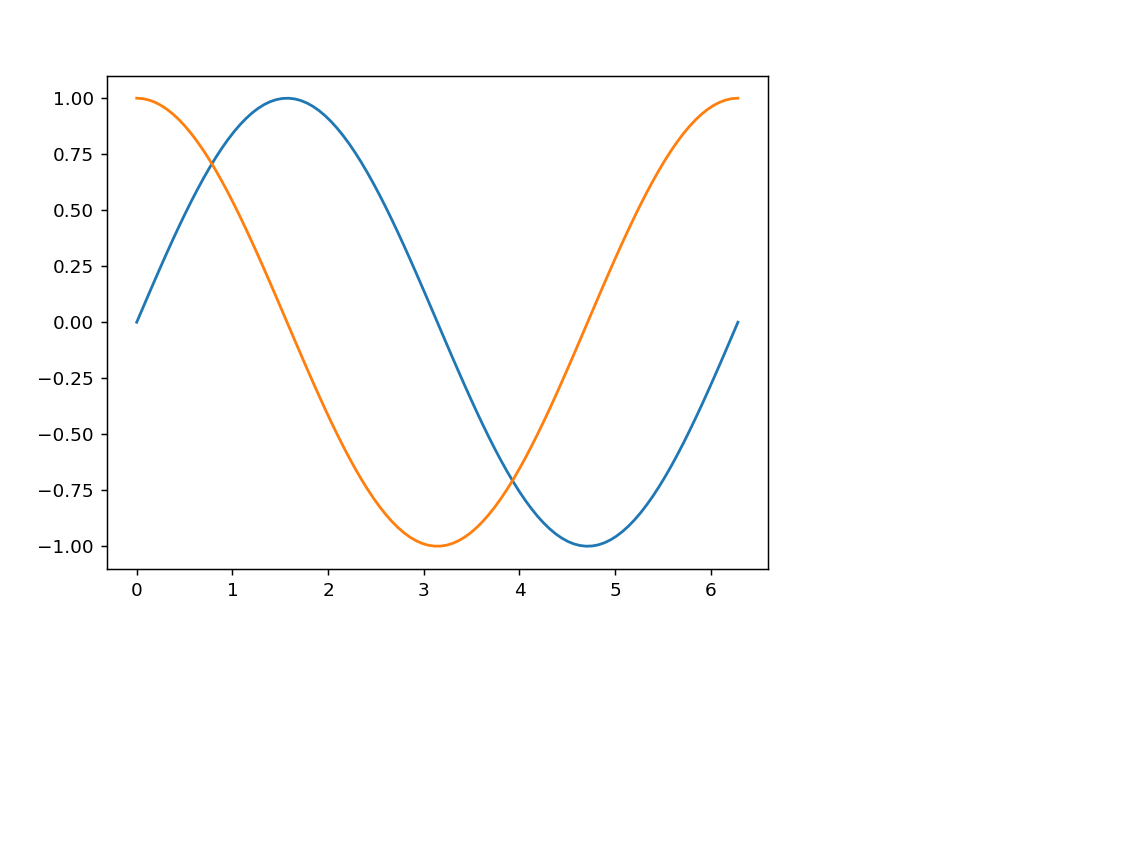

In [7]:
x = np.linspace(0, 2*np.pi, 100)
sinx = np.sin(x)

cosx = np.cos(x)

plt.plot(x, sinx)
plt.plot(x, cosx)
plt.show()

### Figures

`matplotlib` plots are drawn onto a `Figure` object. Python creates one of these automatically if there isn't one defined when you try to make a plot, but it is much better practice to define one first, like this:

<IPython.core.display.Javascript object>


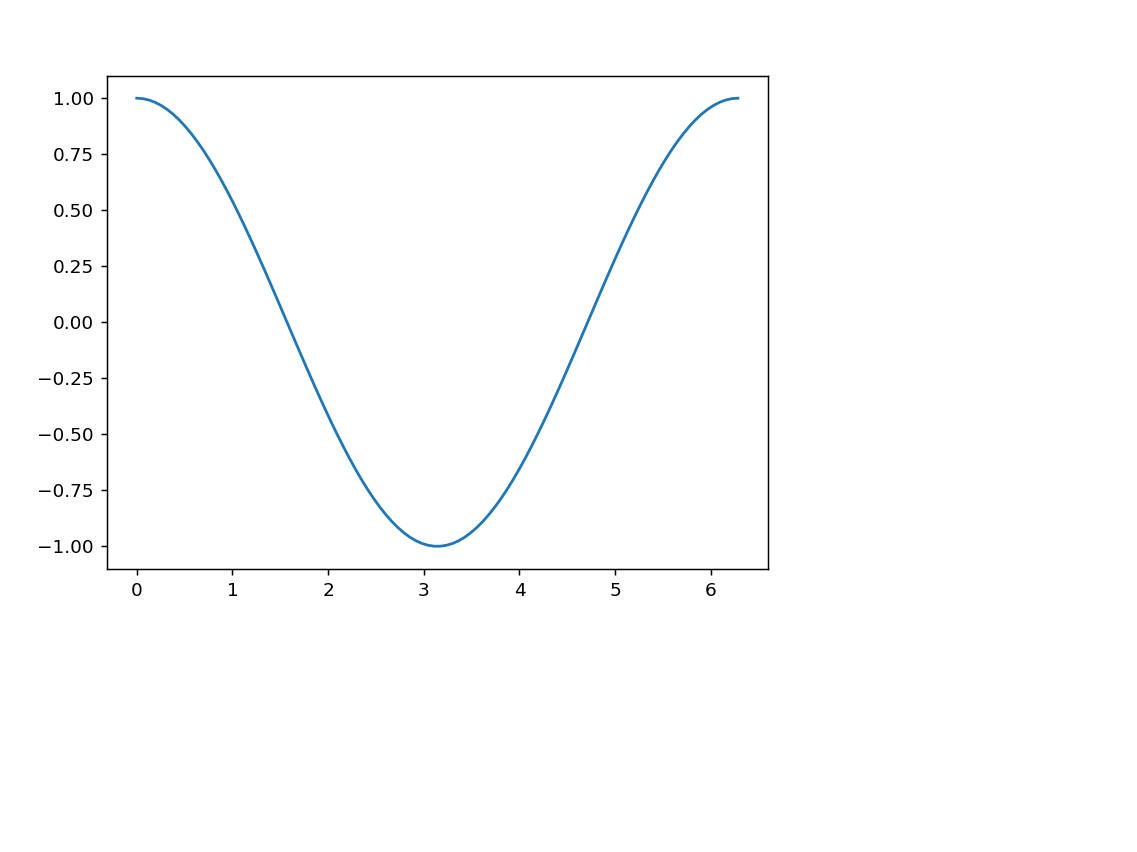

In [9]:
fig = plt.figure()

plt.plot(x, cosx)
plt.show()

So far this has made very little practical difference, but now the `Figure` is a defined variable in our top-level code, rather than being hidden away inside `matplotlib`, so we can manipulate it.

### Axes and subplots

For example, Python also automatically creates an `Axes` object when you draw onto an empty `Figure`. This is fine if you only want one plot, but by calling a method of the `Figure`, we can add multiple `Axes` and plot on them separately.

The method we'll use is `add_subplot()`, which takes three arguments. The first two specify the number of plots you want in the vertical and horizontal directions, repectively, and the third specifies the number position at which you want to place the plot in this implied grid. The numbering goes from top to bottom, left to right, and starts at 1, rather than at 0 as with indexing.

As with `Figure`s, having defined some `Axes` we can manipulate them to tweak our plots. In this example we'll just demonstrate by changing the limits of the x-axis on one of the plots, but there are lots of other things that can be done to change the plot's appearance.

<IPython.core.display.Javascript object>


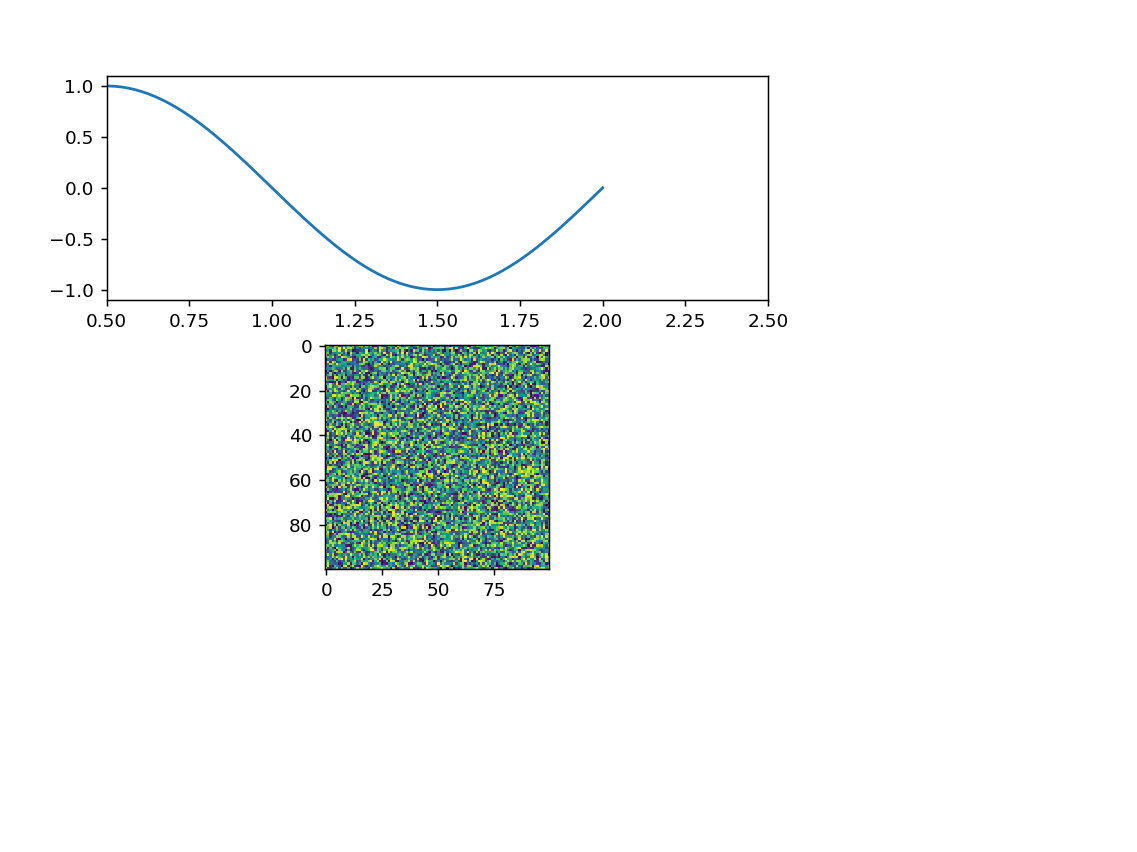

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

data = np.random.rand(100,100)

ax1.plot(x/np.pi, sinx)
ax2.imshow(data)

ax1.set_xlim(0.5, 2.5)

plt.show()

This way of adding subplots is fine, but a little clunky, especially if you want to plot lots of things on one figure. For this you can use the `subplots()` function instead, which just takes the horizontal and vertical extents of the grid you want, and returns _all_ the subplots in an array.

<IPython.core.display.Javascript object>


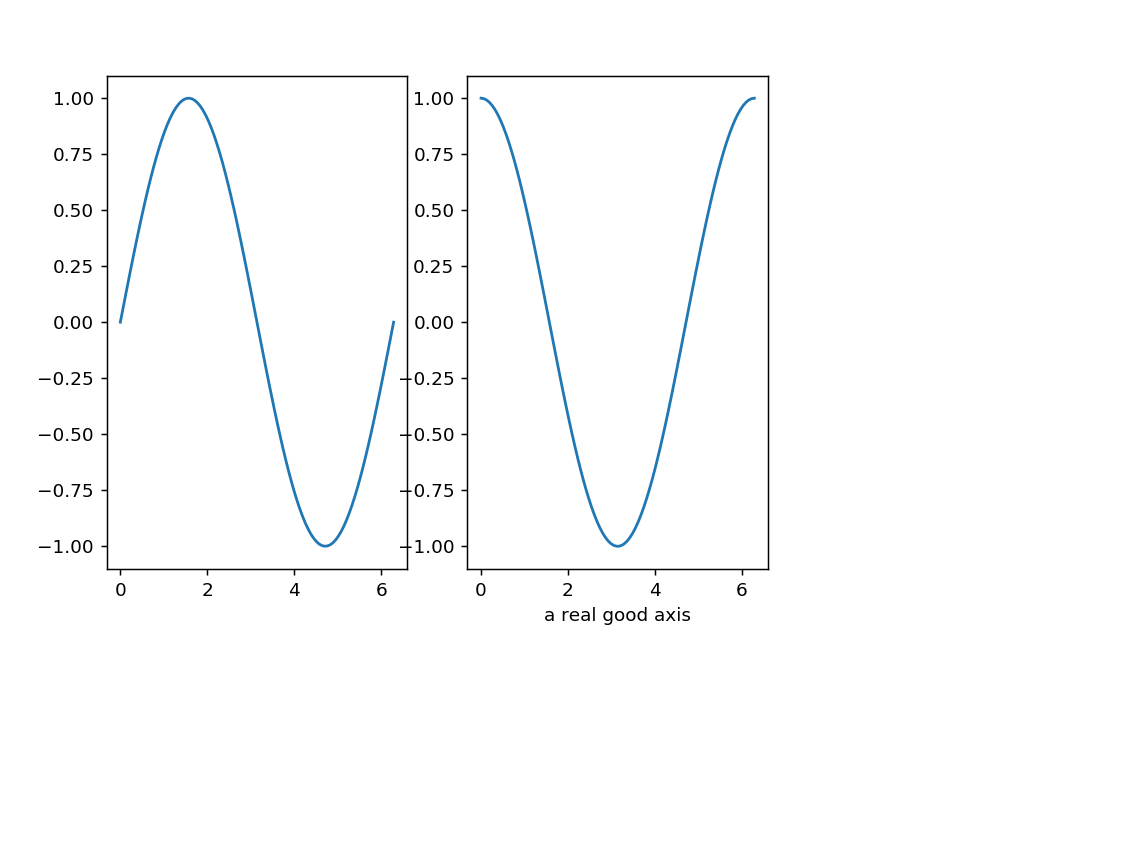

In [18]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(x, sinx)
ax[1].plot(x, cosx)

ax[1].set_xlabel('a real good axis')

plt.show()

## Working with solar data

The core of SunPy's functionality is that it provides three objects for dealing with solar data types: `Map` for solar image data, `Lightcurve` for time-series data and `Spectra` for spectral data. Today we'll be focusing exclusively on `Map`, which is the most used and most developed, but it is worth being aware that the others exist should you need them.

SunPy also provides several sample data files, which need to be manually downloaded. For this example we'll use the sample AIA 17.1nm image.

In [22]:
import sunpy.map
from sunpy.data import download_sample_data

download_sample_data()

[PosixPath('/home/drew/.local/share/sunpy/aiacalibim5.fits.gz'),
 PosixPath('/home/drew/.local/share/sunpy/HMI20110607_063211_los_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063301_0131_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063302_0171_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063302_0211_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063303_0335_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063305_0094_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063305_1600_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063307_0193_lowres.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063307_0193_cutout.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_063931_0193_cutout.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA20110607_064555_0193_cutout.fits'),
 PosixPath('/home/drew/.local/share/sunpy/AIA

Once the sample data has been downloaded, you can import the `AIA_171_IMAGE` variable. Notice that this is not the image itself, but a string corresponding to the location of the image on disk. A `Map` object is created by passing `Map()` the filename of a valid fits image file, such as the one defined in `AIA_171_IMAGE`.

In [26]:
from sunpy.data.sample import AIA_171_IMAGE

print(AIA_171_IMAGE)
mymap = sunpy.map.Map(AIA_171_IMAGE)

mymap

/home/drew/.local/share/sunpy/AIA20110607_063302_0171_lowres.fits


SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2011-06-07 06:33:02
Exposure Time:		 0.234256 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [2.402792 2.402792] arcsec / pix
Reference Pixel:	 [512.5 512.5] pix
Reference Coord:	 [3.22309951 1.38578135] arcsec
array([[ -95.92475  ,    7.076416 ,   -1.9656711, ..., -127.96519  ,
        -127.96519  , -127.96519  ],
       [ -96.97533  ,   -5.1167884,    0.       , ...,  -98.924576 ,
        -104.04137  , -127.919716 ],
       [ -93.99607  ,    1.0189276,   -4.0757103, ...,   -5.094638 ,
         -37.95505  , -127.87541  ],
       ...,
       [-128.01454  , -128.01454  , -128.01454  , ..., -128.01454  ,
        -128.01454  , -128.01454  ],
       [-127.899666 , -127.899666 , -127.899666 , ..., -127.899666 ,
        -127.899666 , -127.899666 ],
       [-128.03072  , -128.03072  , -128.03072  , ..., -128.03

The two most important attributes of this new variable are `mymap.data`, which contains an array of the pixel values of the image, and `mymap.meta`, which contains the header information. Both of these are loaded from the specified file.

In [28]:
print(mymap.data)
print(mymap.meta)

[[ -95.92475      7.076416    -1.9656711 ... -127.96519   -127.96519
  -127.96519  ]
 [ -96.97533     -5.1167884    0.        ...  -98.924576  -104.04137
  -127.919716 ]
 [ -93.99607      1.0189276   -4.0757103 ...   -5.094638   -37.95505
  -127.87541  ]
 ...
 [-128.01454   -128.01454   -128.01454   ... -128.01454   -128.01454
  -128.01454  ]
 [-127.899666  -127.899666  -127.899666  ... -127.899666  -127.899666
  -127.899666 ]
 [-128.03072   -128.03072   -128.03072   ... -128.03072   -128.03072
  -128.03072  ]]
MetaDict([('simple', True), ('bitpix', -32), ('naxis', 2), ('naxis1', 1024), ('naxis2', 1024), ('pcount', 0), ('gcount', 1), ('xtension', 'BINTABLE'), ('bld_vers', 'V5R12X'), ('lvl_num', 1.5), ('t_rec', '2011-06-07T06:33:03Z'), ('trecstep', 1.0), ('trecepoc', '1977.01.01_00:00:00_TAI'), ('trecroun', 1), ('origin', 'SDO'), ('date', '2012-10-16T19:45:34'), ('telescop', 'SDO'), ('instrume', 'AIA_3'), ('date-obs', '2011-06-07T06:33:02.77'), ('t_obs', '2011-06-07T06:33:02.88Z'), ('ca

`Map` has many other attributes and methods that provide information about the image. Many of these make information from the header more readily available, so in practice you should not often have to deal with `Map.meta` directly.

In [31]:
print(mymap.date)
print(mymap.mean())
print(mymap.coordinate_system)

2011-06-07T06:33:02.770
427.02252
SpatialPair(axis1='HPLN-TAN', axis2='HPLT-TAN')


Now let's get back to displaying data. There are two methods for plotting and displaying a `Map`. The first is `peek()`. This method is quick and easy to use, and automatically does a few things to make the plot look nice - it adds a title, sensible axes labels, a colourbar and a coordinate grid.

<IPython.core.display.Javascript object>


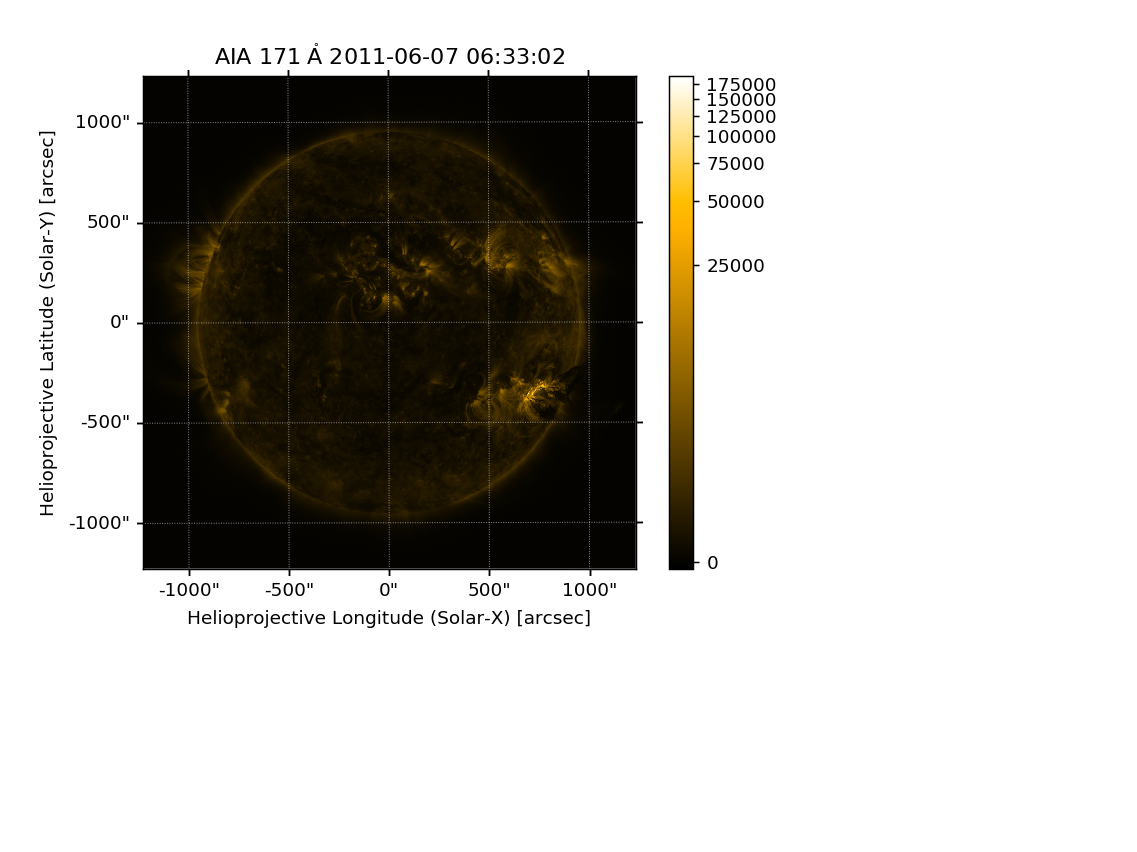

In [32]:
mymap.peek()

This is useful for quickly inspecting data, but can't really be customised much past this stage, so it isn't very flexible.

The other plotting method, `plot()`, produces a very slightly simpler plot by default:

<IPython.core.display.Javascript object>


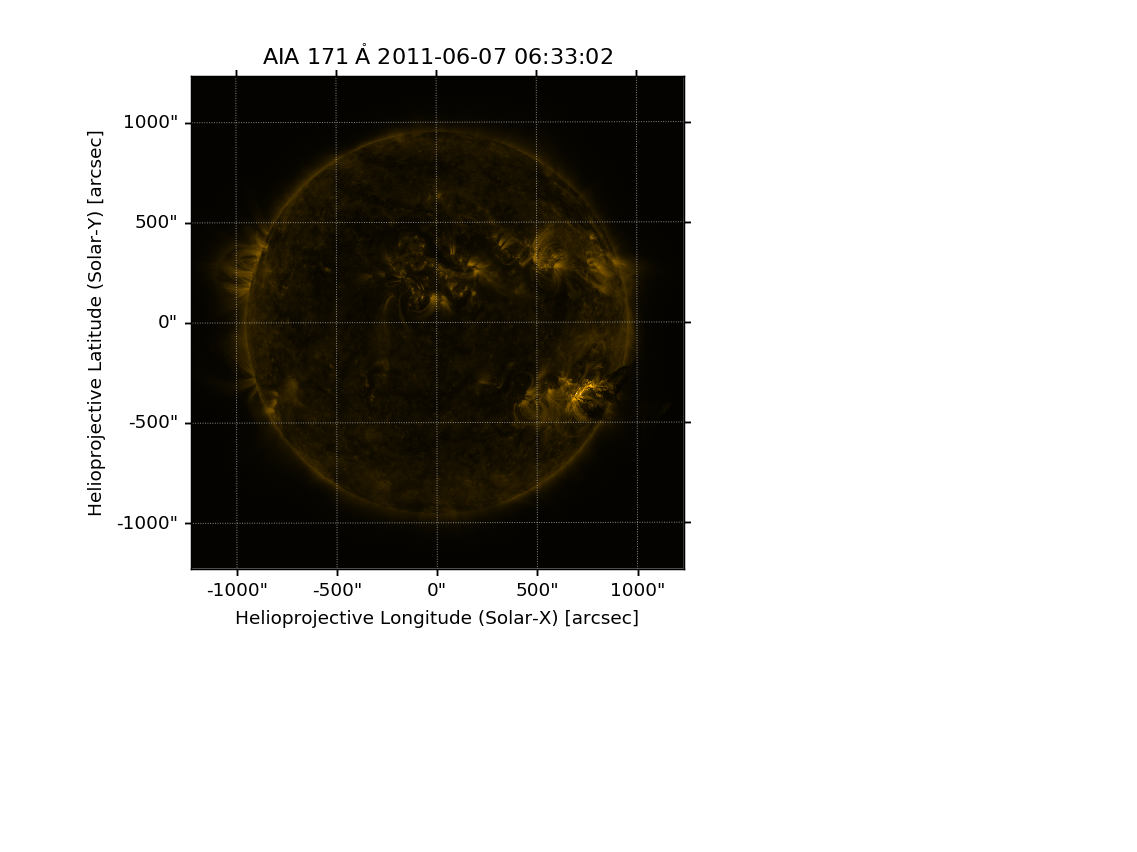

In [33]:
fig = plt.figure()
mymap.plot()
plt.show()

But the advantage of using this method is that it provides a plot that can be customised in many of the same ways as a normal line or image plot. This can be done with various functions in `pyplot`, and by passing keyword arguments to the `plot()` function.

<IPython.core.display.Javascript object>


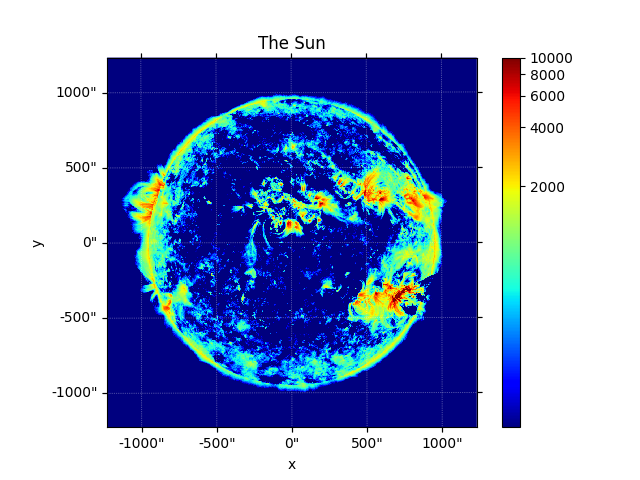

In [56]:
fig = plt.figure()
mymap.plot(vmin=500, vmax=10000, cmap='jet')
plt.title('The Sun')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

### Submaps

`Map`s have the very useful functionality of being croppable. Using the `submap` method, you can crop a `Map` to specified coordinates, creating a new map with an updated header. This means all the attributes of the new `Map` are correct for the newly cropped data, so you never need to worry about updating it yourself.

In [42]:
mymap.coordinate_frame

<Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>

In [43]:
mymap.submap?

427.02252 
 2011-06-07T06:33:02.770 
 <Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>
505.7605 
 2011-06-07T06:33:02.770 
 <Helioprojective Frame (obstime=2011-06-07T06:33:02.770, rsun=696000000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.770): (lon, lat, radius) in (deg, deg, m)
    (-0.00406308, 0.04787238, 1.51846026e+11)>)>


<IPython.core.display.Javascript object>


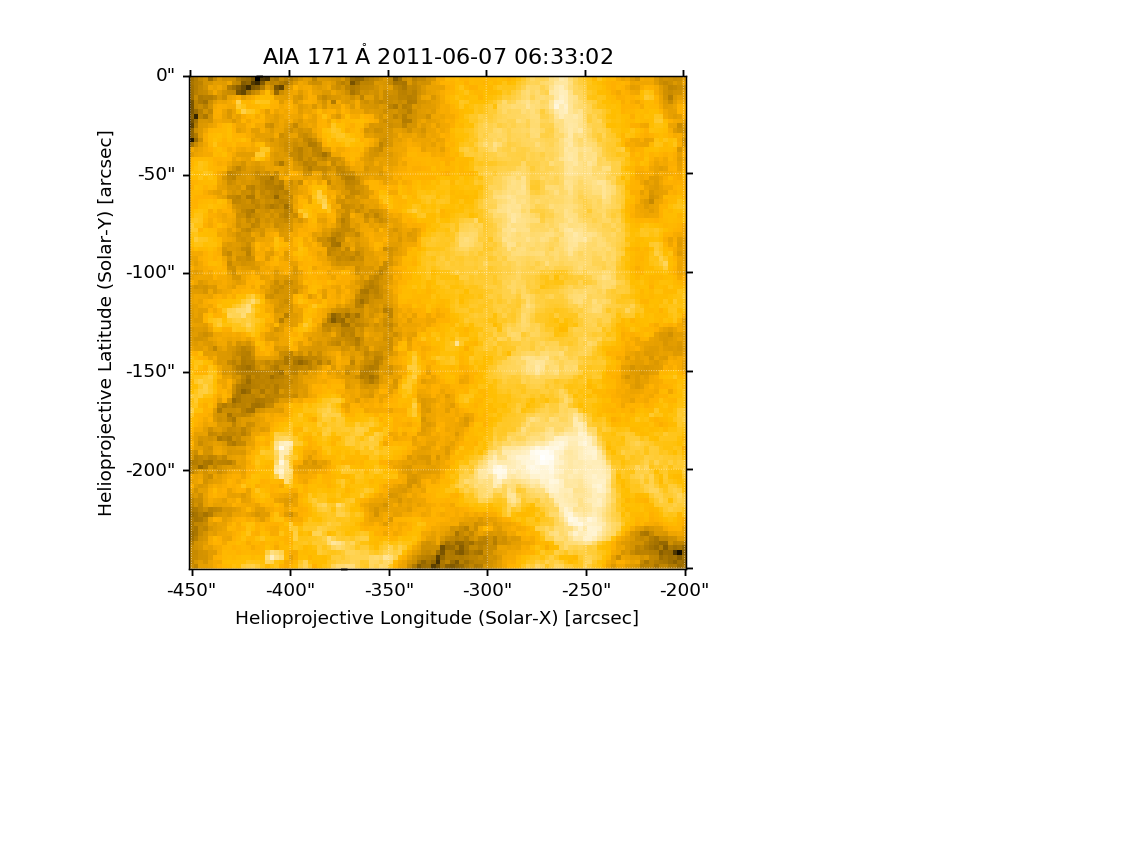

In [48]:
import astropy.units as u
from astropy.coordinates import SkyCoord

print(mymap.mean(), '\n', mymap.date, '\n', mymap.coordinate_frame)

smap = mymap.submap(SkyCoord(-450*u.arcsec, -250*u.arcsec),
                    SkyCoord(-200*u.arcsec, 0*u.arcsec))

print(smap.mean(), '\n', smap.date, '\n', smap.coordinate_frame)

fig = plt.figure()
smap.plot()
plt.show()

## Challenge: Putting it all together

1. Plot the sample AIA 17.1nm image, next to a submap of some interesting feature. Give both plots a colourbar and change the titles. 
1. Plot a black cross at the same point on both images.
1. Plot a rectangle on the full `Map` which corresponds to the edges of the submap.

**Hints:**
- You can specify an axes to draw on by passing it into `plot()`, like this: `mymap.plot(axes=ax)`
- `Map` has a `draw_rectangle()` method.
- Have a look at the `SkyCoord`  object we used above - you'll find it useful

In [55]:
mymap.draw_rectangle?

<IPython.core.display.Javascript object>


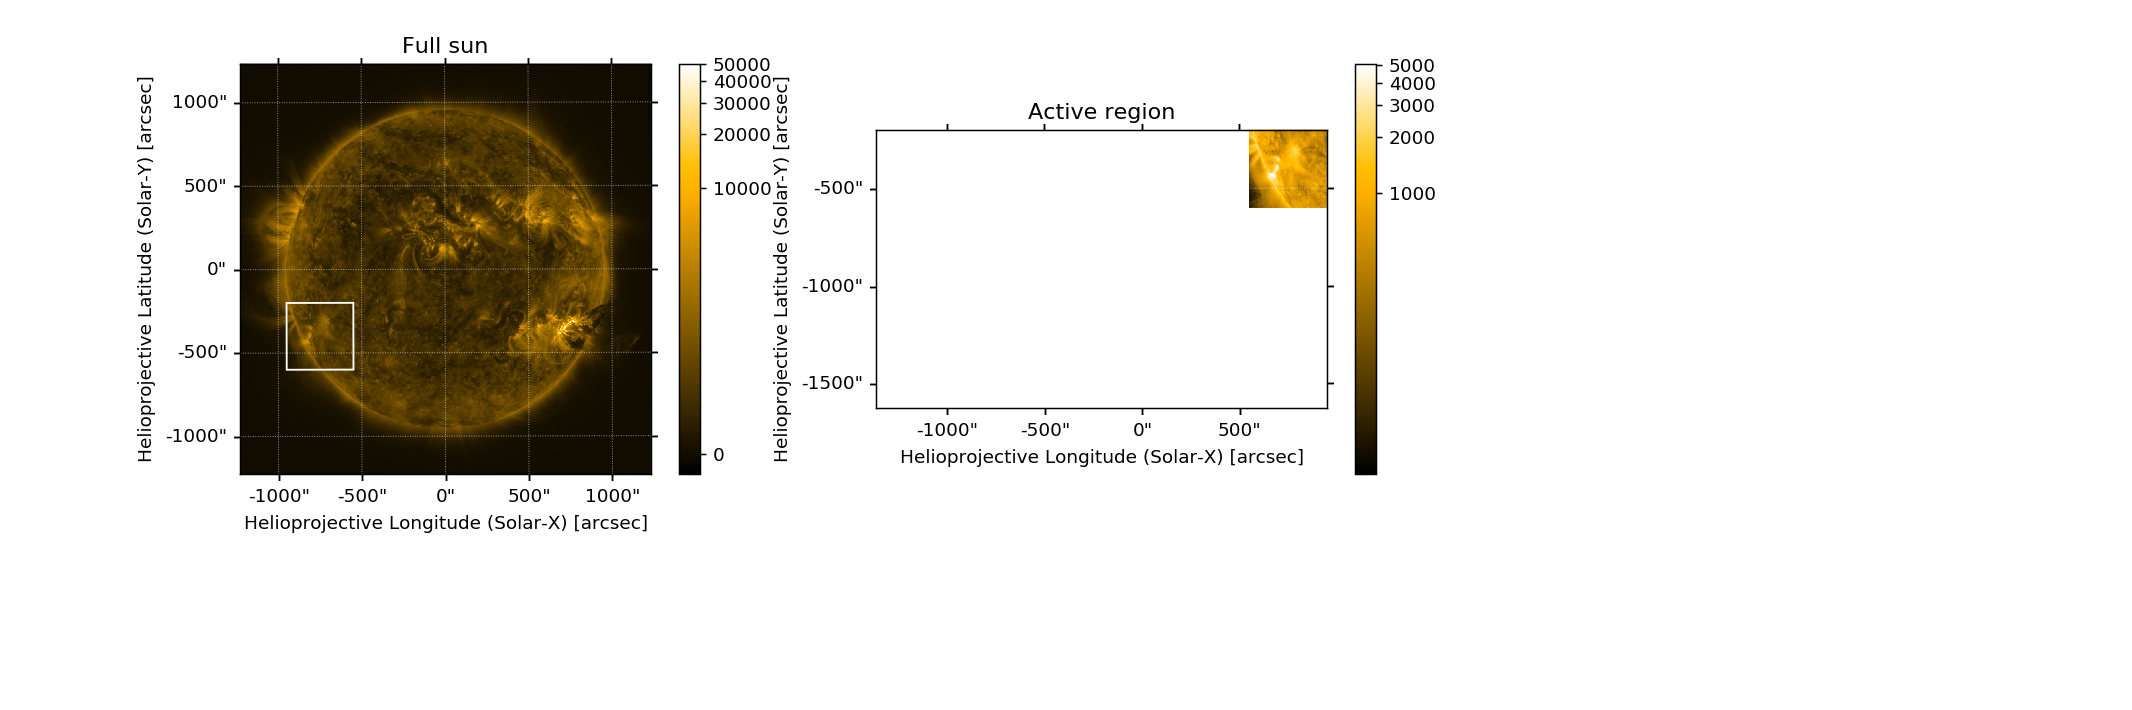

In [59]:
#fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig = plt.figure(figsize=(12, 4))
ax0 = fig.add_subplot(1, 2, 1, projection=mymap)
ax1 = fig.add_subplot(1, 2, 2, projection=smap)

mymap.plot(axes=ax0, vmax=50000) # Plot the full Map
plt.title('Full sun') # Change the title
plt.colorbar() # Show a colour bar
# Define the bottom-left corner, width and height of a rectangle from the ranges of the submap
x0 = -750 * u.arcsec
y0 = -400 * u.arcsec
width = 400 * u.arcsec
height = 400 * u.arcsec
bottom_left = SkyCoord(x0-width/2, y0-height/2, frame=mymap.coordinate_frame)
mymap.draw_rectangle(SkyCoord(x0-width/2, y0-height/2, frame=mymap.coordinate_frame), 
                     width, height) # Draw the rectangle
#plt.plot(x0, y0, marker='x', color='white') # Plot a single point with a white cross

# Same again on the right
top_right = SkyCoord(x0+width/2, y0+height/2, frame=mymap.coordinate_frame)
smap = mymap.submap(bottom_left, top_right)
smap.plot(axes=ax1)
plt.title('Active region')
plt.colorbar()
plt.plot(x0, y0, 'wx')

plt.show()